In [1]:
import json
import bz2
tweets = []
for line in open('yelp_academic_dataset_business.json', 'r'):
    tweets.append(json.loads(line))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2907: character maps to <undefined>

In [4]:
#opening json file
import pandas as pd
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [5]:
#dropping irrelevant columns
drop_columns = ['latitude','longitude','postal_code','state','address','name']
df_b = df_b.drop(drop_columns, axis=1)

In [6]:
df1 = pd.read_csv('review1.csv')

In [7]:
df1=df1.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [8]:
df2 = pd.read_csv('review2.csv')
df2=df2.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [9]:
df3 = pd.read_csv('review3.csv')
df3=df3.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [10]:
df4 = pd.read_csv('review4.csv')
df4=df4.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [11]:
df5 = pd.read_csv('review5.csv')
df5=df5.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [12]:
df6 = pd.read_csv('review6.csv')
df6=df6.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [13]:
df7 = pd.read_csv('review7.csv')
df7=df7.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [14]:
df8 = pd.read_csv('review8.csv')
df8=df8.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [15]:
df9 = pd.read_csv('review9.csv')
df9=df9.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [16]:
df10 = pd.read_csv('review10.csv')
df10=df10.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [17]:
df11 = pd.read_csv('review11.csv')
df11=df11.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [18]:
df12 = pd.read_csv('review12.csv')
df12=df12.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [19]:
df13 = pd.read_csv('review13.csv')
df13=df13.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [20]:
df14 = pd.read_csv('review14.csv')
df14=df14.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [21]:
df15 = pd.read_csv('review15.csv')
df15=df15.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [22]:
df16 = pd.read_csv('review16.csv')
df16=df16.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [23]:
df17 = pd.read_csv('review17.csv')
df17=df17.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [24]:
df18 = pd.read_csv('review18.csv')
df18=df18.drop(['text','review_id','user_id','funny','cool'], axis=1)

In [70]:
#create a dataframe with all the reviews but without the text which is not relevant for the analysis
frames = [df1, df2, df3,df4, df5, df6,df7, df8, df9,df10, df11, df12,df13, df14, df15,df16, df17, df18]
result = pd.concat(frames)

MemoryError: Unable to allocate 65.9 MiB for an array with shape (8635403,) and data type int64

In [ ]:
result

In [26]:
#drop all the elements of the list without attributes
for i in range(len(tweets)):
    if None in tweets[i]:
        tweets.pop(i)

In [27]:
#check if there are any attributes in common
import numpy as np
a=1
for i in range(len(tweets)):
    if np.logical_not('ByAppointmentOnly' in tweets[i]):
        a=0
    if a==0:
        break

In [28]:
#after different check to see if there are any attributes in common for the restaurants we decide to drop also attribute column
df_b=df_b.drop('attributes',axis=1)


In [29]:
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_new=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [30]:
def contaM(st):
    a=st.get('Monday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaTu(st):
    a=st.get('Tuesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaW(st):
    a=st.get('Wednesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaT(st):
    a=st.get('Thursday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaF(st):
    a=st.get('Friday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaSa(st):
    a=st.get('Saturday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaS(st):
    a=st.get('Sunday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]

def converti(st):
    hours=0
    if 'Monday' in st:
        hours+=contaM(st)
    if 'Tuesday' in st:
        hours+=contaTu(st)
    if 'Wednesday' in st:
        hours+=contaW(st)
    if 'Thursday' in st:
        hours+=contaT(st)
    if 'Friday' in st:
        hours+=contaF(st)
    if 'Saturday' in st:
        hours+=contaSa(st)
    if 'Sunday' in st:
        hours+=contaS(st)
    return hours

In [31]:
df_new=df_new.reset_index()

In [32]:
df_new['nhours']=float(0)
for i in range(len(df_new)):
    df_new['nhours'][i]=converti(df_new['hours'][i])

<ipython-input-32-f80e3afcfa7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['nhours'][i]=converti(df_new['hours'][i])


In [33]:
#df_new[df_new['nhours']%1!=0]

In [34]:
df_new=df_new.drop('hours',axis=1)
df_new

,index,business_id,city,stars,review_count,is_open,categories,nhours
0,0,6iYb2HFDywm3zjuRg0shjw,Boulder,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B...",84.0
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
2,5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,3.5,169,1,"Restaurants, Thai",28.0
3,7,jFYIsSb7r1QeESVUnXPHBw,Columbus,4.5,11,1,"Breakfast & Brunch, Restaurants",12.0
4,12,HPA_qyMEddpAEtFof02ixg,Peabody,4.0,39,1,"Food, Pizza, Restaurants",62.0
...,...,...,...,...,...,...,...,...
42870,160572,r5Uag1JqYjr2nbxQCVqm8A,Orlando,4.5,437,1,"Restaurants, Noodles, Salad, Vietnamese, Veget...",90.5
42871,160573,Zl6SUy6x9jqjRu2HbtEO6A,Tigard,2.0,48,0,"American (Traditional), Desserts, American (Ne...",87.0
42872,160574,Q78fYV6B6P6GmX07YVgi4g,Bee Cave,3.0,310,1,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants",97.0
42873,160575,uXdQkuEtvLAzfc3MsO-sTQ,Atlanta,3.0,185,1,"Restaurants, Mexican, Latin American",168.0


In [35]:
np.where(df_new.groupby(by = 'city').count()['index'].values==4898)
df_new.groupby(by = 'city').count().index.values[314]


'Portland'

We will focus on the restaurants of Portland

In [36]:
df_city = df_new[df_new['city']=='Portland']
df_city.sample(10)

,index,business_id,city,stars,review_count,is_open,categories,nhours
7355,27654,zce0BtmO0uMCZu8-bKjdvw,Portland,4.0,184,0,"French, Modern European, Restaurants, Vegan, F...",18.0
27634,104205,ivks5fxkoA41wtx2N3IUwg,Portland,4.5,25,0,"Nightlife, American (New), Bars, Wine Bars, Re...",32.0
30139,113119,zJCDBJ9nICqxd0GmNf9xzw,Portland,4.0,202,1,"Pool Halls, Sports Bars, Lounges, Nightlife, B...",66.5
36187,135881,lK-I8qZGu_ne56maS5im3Q,Portland,3.5,450,1,"American (Traditional), Restaurants, Chicken W...",84.0
42393,158792,-qDkxBd-FO5rNFDfBJLkCw,Portland,4.0,12,1,"Restaurants, Shopping Centers, Food Stands, Fo...",77.0
22990,86763,TCx3vm9ScV8pyzsVYjRc0w,Portland,4.5,87,0,"Bakeries, Coffee & Tea, Breakfast & Brunch, Re...",68.0
17386,65698,Ba9UAZ_GEL0DG8mwm2HkRQ,Portland,4.5,88,1,"Restaurants, Soul Food, Food Trucks, Food, Str...",19.0
7733,29063,IM_BIe6C307OrCXjUzfgPA,Portland,4.0,23,0,"Pizza, Restaurants",68.0
23657,89259,Es2XfCY9TkthrKo3CCD6Qw,Portland,4.0,169,1,"Food, Vegan, Restaurants, Juice Bars & Smoothi...",24.0
16237,61385,270zH2MahbuPSyiTzeUx8w,Portland,4.0,44,0,"Coffee & Tea, Food, Cafes, Restaurants",58.5


In [37]:
df_closed = df_city[df_city['is_open']==0]

In [38]:
array_attributes = df_city['categories'].values
attributes_list = []
for i in array_attributes:
    attributes_list.append(i.split(','))
new_list_attributes = [el for sublist in attributes_list for el in sublist]
list_attributes = list(set(new_list_attributes))

In [39]:
df_city[df_city['categories'].str.contains('Restaurants')] 

,index,business_id,city,stars,review_count,is_open,categories,nhours
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
12,36,jx91IMdGOmLOo8h_F9z39g,Portland,3.5,19,1,"Nightlife, Sandwiches, Seafood, Restaurants",114.0
16,50,5PsApTz-WqhF_-8mfqGtGw,Portland,3.5,158,1,"Vegetarian, Vegan, Sandwiches, Soup, American ...",47.0
30,93,HMXiuCxHDXqMH1hBpaHd9g,Portland,5.0,7,0,"Food Stands, Restaurants, Sandwiches",75.0
31,94,ZA3u0Nu5V6TqkcYh8U0zdg,Portland,4.5,131,0,"Restaurants, Food, Sandwiches, Breakfast & Bru...",55.5
...,...,...,...,...,...,...,...,...
42850,160509,ny28j9D88xot0Eq54ojpVQ,Portland,3.5,131,0,"Italian, Restaurants",25.0
42851,160512,7r311z2Uq_UzHqu5hiipxA,Portland,4.0,165,1,"Food Stands, Food, Street Vendors, Restaurants...",63.0
42854,160521,68nXXzFyK8tzcBlv8eM3tw,Portland,3.5,108,1,"Pubs, Breweries, Food, American (Traditional),...",56.0
42859,160537,ER_VMRSD-9FSbw4SGGNQvA,Portland,3.5,13,0,"Fashion, Men's Clothing, Restaurants, Shopping...",49.0


In [40]:
#import matplotlib.pyplot as plt
#for el in set_attributes:
    #sb.countplot(data = df_city[df_city['categories'].str.contains(el)], x='is_open')
    #plt.title(el)
    #plt.show()

In [41]:
df_city[df_city['categories'].str.contains('Pet Services')].groupby(by='is_open').count()

,index,business_id,city,stars,review_count,categories,nhours
is_open,,,,,,,
0,2,2,2,2,2,2,2


In [42]:
cat=df_city.categories.str.replace(' ', '')
cat

1        Salad,Soup,Sandwiches,Delis,Restaurants,Cafes,...
12                Nightlife,Sandwiches,Seafood,Restaurants
16       Vegetarian,Vegan,Sandwiches,Soup,American(New)...
30                       FoodStands,Restaurants,Sandwiches
31       Restaurants,Food,Sandwiches,Breakfast&Brunch,G...
                               ...                        
42850                                  Italian,Restaurants
42851       FoodStands,Food,StreetVendors,Restaurants,Thai
42854    Pubs,Breweries,Food,American(Traditional),Bars...
42859    Fashion,Men'sClothing,Restaurants,Shopping,Wom...
42866    EventPlanning&Services,Steakhouses,Seafood,Ven...
Name: categories, Length: 4898, dtype: object

In [43]:
array_attributes = cat.values
attributes_list = []
for i in array_attributes:
    attributes_list.append(i.split(','))
new_list_attributes = [el for sublist in attributes_list for el in sublist]
list_attributes = list(set(new_list_attributes))

In [44]:
df_city[df_city['categories'].str.contains('Restaurant')].count().values[0]

4898

In [45]:
mag = []
for el in list_attributes:
    if df_city[df_city['categories'].str.contains(el)].count().values[0] > 300:
        mag.append(el)

C:\Users\Luca\anaconda3\envs\introml\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [46]:
mag.remove('Restaurants')
mag.remove('Food')
mag

['Cafes',
 'Beer',
 'Sandwiches',
 'Mexican',
 'Burgers',
 'Bars',
 'Pizza',
 'Nightlife']

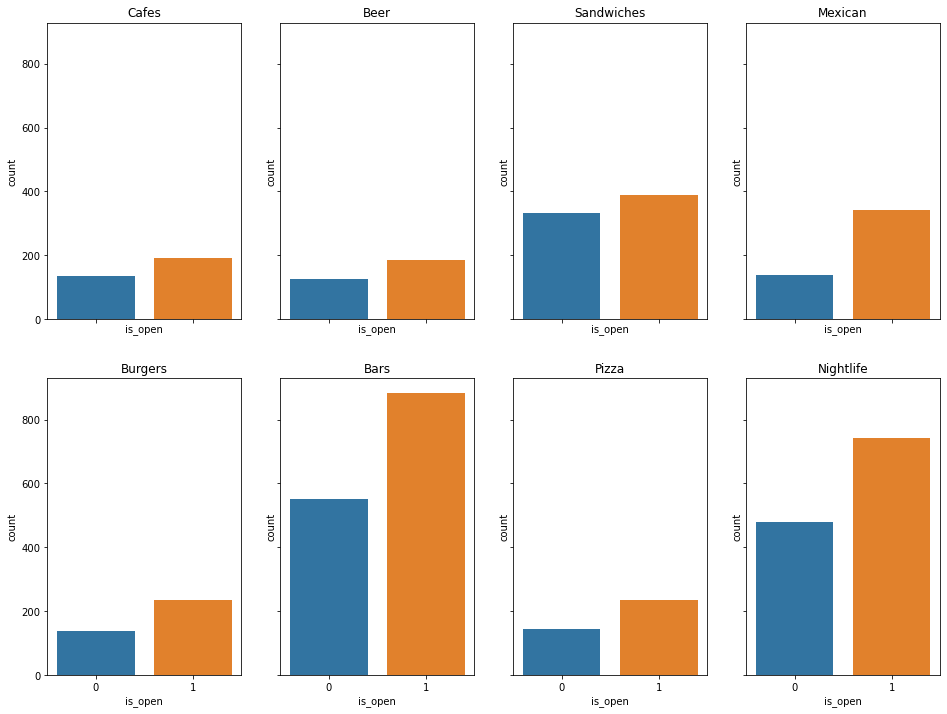

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb
fig, axes = plt.subplots(2,4, sharex=True, sharey= True, figsize = (16,12))
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[i])], x = 'is_open', ax = axes[0, i]).set_title(mag[i])
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[4+i])], x = 'is_open', ax = axes[1, i]).set_title(mag[4+i])

In [48]:
for i in mag:
    array = np.zeros(len(df_city))
    indices_true = np.where(df_city['categories'].str.contains(i).values==True)
    array[indices_true]= 1
    df_city.insert(1, i, array.tolist())

In [49]:
from datetime import datetime
result['date'].values[0]

'2014-10-11 03:34:02'

In [50]:
for i in range(1,len(result)):
    result['date'].values[i]=datetime.fromisoformat(result['date'].values[i]).timestamp()


In [51]:
dic = {}
for ids in df_city.business_id.values:
    df_temp=result[result['business_id']==ids]
    df_temp.sort_values('date', ascending=False).head(100)
    dic[ids]=df_temp['stars'].head(100).mean()

In [58]:
df_to_add = pd.DataFrame(columns=['business_id','medium_stars_last100'])
df_to_add['business_id']=dic.keys()
df_to_add['medium_stars_last100']=dic.values()
df_to_add

,business_id,medium_stars_last100
0,tCbdrRPZA0oiIYSmHG3J0w,4.180000
1,jx91IMdGOmLOo8h_F9z39g,3.450000
2,5PsApTz-WqhF_-8mfqGtGw,3.490000
3,HMXiuCxHDXqMH1hBpaHd9g,5.000000
4,ZA3u0Nu5V6TqkcYh8U0zdg,4.270000
...,...,...
4893,ny28j9D88xot0Eq54ojpVQ,3.630000
4894,7r311z2Uq_UzHqu5hiipxA,3.810000
4895,68nXXzFyK8tzcBlv8eM3tw,3.400000
4896,ER_VMRSD-9FSbw4SGGNQvA,3.692308


In [59]:
df_final = pd.merge(df_to_add, df_city)
df_final=df_final.drop('categories',axis=1)

In [60]:
df_final

,business_id,medium_stars_last100,index,Nightlife,Pizza,Bars,Burgers,Mexican,Sandwiches,Beer,Cafes,city,stars,review_count,is_open,nhours
0,tCbdrRPZA0oiIYSmHG3J0w,4.180000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Portland,4.0,126,1,90.0
1,jx91IMdGOmLOo8h_F9z39g,3.450000,36,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Portland,3.5,19,1,114.0
2,5PsApTz-WqhF_-8mfqGtGw,3.490000,50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Portland,3.5,158,1,47.0
3,HMXiuCxHDXqMH1hBpaHd9g,5.000000,93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Portland,5.0,7,0,75.0
4,ZA3u0Nu5V6TqkcYh8U0zdg,4.270000,94,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Portland,4.5,131,0,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,ny28j9D88xot0Eq54ojpVQ,3.630000,160509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,131,0,25.0
4894,7r311z2Uq_UzHqu5hiipxA,3.810000,160512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,4.0,165,1,63.0
4895,68nXXzFyK8tzcBlv8eM3tw,3.400000,160521,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,108,1,56.0
4896,ER_VMRSD-9FSbw4SGGNQvA,3.692308,160537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,13,0,49.0


In [62]:
result.rename(columns={'stars': 'rates'})

,business_id,rates,useful,date
0,buF9druCkbuXLX526sGELQ,4,3,2014-10-11 03:34:02
1,RA4V8pr014UyUbDvI-LW2A,4,1,1435948705.0
2,_sS2LBIGNT5NQb6PD1Vtjw,5,0,1369766286.0
3,0AzLzHfOJgL7ROwhdww2ew,2,1,1262914155.0
4,8zehGz9jnxPqXtOc7KaJxA,4,0,1311869101.0
...,...,...,...,...
135398,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,1611630434.0
135399,RDgwjgbu5xziFIAaNn3WCQ,1,13,1556738503.0
135400,rbuj2X4SXIc3MDul4dcxIA,5,39,1592008766.0
135401,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,1592855650.0


In [64]:
pd.merge(df_final, result, right_on = 'business_id', left_on = 'business_id')

,business_id,medium_stars_last100,index,Nightlife,Pizza,Bars,Burgers,Mexican,Sandwiches,Beer,Cafes,city,stars_x,review_count,is_open,nhours,stars_y,useful,date
0,tCbdrRPZA0oiIYSmHG3J0w,4.18,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Portland,4.0,126,1,90.0,4,1,1342407845.0
1,tCbdrRPZA0oiIYSmHG3J0w,4.18,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Portland,4.0,126,1,90.0,5,0,1430248270.0
2,tCbdrRPZA0oiIYSmHG3J0w,4.18,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Portland,4.0,126,1,90.0,4,0,1447869005.0
3,tCbdrRPZA0oiIYSmHG3J0w,4.18,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Portland,4.0,126,1,90.0,5,0,1322680541.0
4,tCbdrRPZA0oiIYSmHG3J0w,4.18,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Portland,4.0,126,1,90.0,5,2,1471038448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723351,jYgqSazE0gUyI7qq086Dzw,3.17,160561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,457,1,43.5,4,2,1529778872.0
723352,jYgqSazE0gUyI7qq086Dzw,3.17,160561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,457,1,43.5,1,3,1577344184.0
723353,jYgqSazE0gUyI7qq086Dzw,3.17,160561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,457,1,43.5,1,1,1553798605.0
723354,jYgqSazE0gUyI7qq086Dzw,3.17,160561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,457,1,43.5,5,0,1596329696.0


In [54]:
dic2 = {}
for ids in df_final.business_id.values:
    df_temp=result[result['business_id']==ids]
    df_temp.sort_values('date', ascending=False).head(10)
    dic2[ids]=df_temp['stars'].head(10).mean()

KeyboardInterrupt: 

In [ ]:
df_to_add = pd.DataFrame(columns=['business_id','medium_stars_last10'])
df_to_add['business_id']=dic2.keys()
df_to_add['medium_stars']=dic2.values()
df_to_add

In [ ]:
df_final = pd.merge(df_final, df_to_add)

In [ ]:
df_final

In [56]:
df_final.to_csv('finaldf_closed_restaurants.csv', index=False)

In [57]:
df_final_copy = pd.read_csv('finaldf_closed_restaurants.csv')

In [58]:
df_final_copy

,business_id,medium_stars,index,Cafes,Burgers,Pizza,Bars,Sandwiches,Beer,Mexican,Nightlife,city,stars,review_count,is_open,nhours
0,tCbdrRPZA0oiIYSmHG3J0w,4.180000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Portland,4.0,126,1,90.0
1,jx91IMdGOmLOo8h_F9z39g,3.450000,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Portland,3.5,19,1,114.0
2,5PsApTz-WqhF_-8mfqGtGw,3.490000,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Portland,3.5,158,1,47.0
3,HMXiuCxHDXqMH1hBpaHd9g,5.000000,93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Portland,5.0,7,0,75.0
4,ZA3u0Nu5V6TqkcYh8U0zdg,4.270000,94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Portland,4.5,131,0,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,ny28j9D88xot0Eq54ojpVQ,3.630000,160509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,131,0,25.0
4894,7r311z2Uq_UzHqu5hiipxA,3.810000,160512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,4.0,165,1,63.0
4895,68nXXzFyK8tzcBlv8eM3tw,3.400000,160521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Portland,3.5,108,1,56.0
4896,ER_VMRSD-9FSbw4SGGNQvA,3.692308,160537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Portland,3.5,13,0,49.0


### Logistic Regression model

In [59]:
from statsmodels.stats import diagnostic
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [60]:
from sklearn.model_selection import train_test_split

# We split between train and test

train, test = train_test_split(df_final, test_size=0.2)

In [61]:
# logit is logistic regression.

mod = smf.logit(formula='is_open ~  medium_stars + Cafes + Sandwiches + \
                        Bars + Beer + Pizza	 + \
                        Mexican + Burgers +\
                        Nightlife + stars + review_count +nhours', data=train)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.633269
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                is_open   No. Observations:                 3918
Model:                          Logit   Df Residuals:                     3905
Method:                           MLE   Df Model:                           12
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                 0.06791
Time:                        19:02:07   Log-Likelihood:                -2481.1
converged:                       True   LL-Null:                       -2661.9
Covariance Type:            nonrobust   LLR p-value:                 5.140e-70
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.4400      0.270     -9.043      0.000      -2.969      -1.911
medium_stars     0.7002

From the summary we can see that the factor which are the most important are (with a statistical significance of 0.05):
- medium_stars(as expected)
- Mexicans
- Nightlife
- review_count
- n_hours

We have a small Pseudo R-square, we don't expect a lot from the model

In [62]:
y_pred = [0 if el <0.5 else 1 for el in res.predict(test).values]

We compute the accuracy

In [63]:
from sklearn.metrics import accuracy_score as acc

print(acc(y_pred, test['is_open'].values))

0.6346938775510204


As we can see the accuracy is low

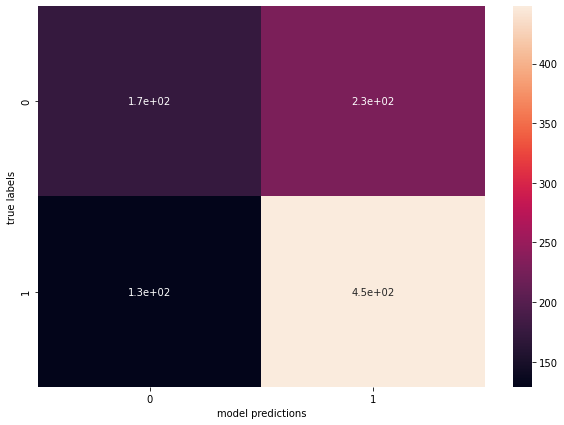

In [64]:
from sklearn import metrics

cm=metrics.confusion_matrix(test['is_open'].values, y_pred)
df_cm = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)
plt.xlabel('model predictions')
plt.ylabel('true labels')
plt.show()

The model has high bias. This suggests us that we should look for a more powerful and complex model to obtain higher accuracy

### We use a more powerful method (Support Vector Machine)

In [147]:
y_train = train['is_open']
x_train = train.drop(columns = ['is_open', 'business_id', 'index', 'city'])
y_test = test['is_open']
x_test = test.drop(columns = ['is_open', 'business_id', 'index', 'city'])
print(x_train)
print(y_train)

      medium_stars  Cafes  Burgers  Pizza  Bars  Sandwiches  Beer  Mexican  \
2268      4.561404    0.0      0.0    0.0   0.0         0.0   0.0      1.0   
101       3.636364    0.0      0.0    0.0   0.0         1.0   0.0      0.0   
393       3.649123    0.0      0.0    0.0   1.0         0.0   0.0      0.0   
3416      4.285714    0.0      0.0    0.0   0.0         0.0   0.0      1.0   
1363      4.250000    0.0      0.0    0.0   1.0         0.0   0.0      0.0   
...            ...    ...      ...    ...   ...         ...   ...      ...   
4894      3.810000    0.0      0.0    0.0   0.0         0.0   0.0      0.0   
1100      3.500000    0.0      0.0    0.0   1.0         0.0   0.0      1.0   
2005      4.108696    0.0      0.0    0.0   0.0         0.0   0.0      0.0   
3027      4.253731    0.0      0.0    0.0   0.0         0.0   0.0      0.0   
109       3.540000    0.0      0.0    0.0   1.0         0.0   0.0      0.0   

      Nightlife  stars  review_count  nhours  
2268        0.0 

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [166]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# we set some of the possible values of the parameters which we will use to fit the models
param = {'kernel' : ['poly', 'rbf', 'sigmoid'],'C' : [0.1,1,10,100,1000],'coef0' : [7,5,1,0.1,0.01],'gamma' : ['auto','scale']},

#we define the model
modelsvc = SVC()

#we perform a grid search to find the best parameters in the param dictionary created before 
clf = GridSearchCV(estimator= modelsvc, param_grid=param, verbose=2, n_jobs=-1)

#we fit the model with the best parameters
clf.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=({'C': [0.1, 1, 10, 100, 1000],
                          'coef0': [7, 5, 1, 0.1, 0.01],
                          'gamma': ['auto', 'scale'],
                          'kernel': ['poly', 'rbf', 'sigmoid']},),
             verbose=2)

In [167]:
print(clf.best_estimator_) #we print the best parameters found with gridsearch
y_pred = clf.predict(x_test) #we predict now the labels

SVC(C=100, coef0=5, gamma='auto', kernel='poly')


In [168]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in y_pred] #python comprehension

In [169]:
accuracy = acc(y_test, pred)
print(accuracy)

0.6663265306122449


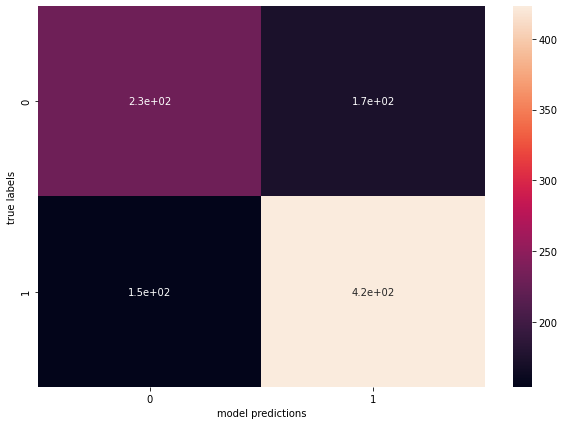

In [170]:
cm=metrics.confusion_matrix(y_test, np.array(pred))
df_cm = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)
plt.xlabel('model predictions')
plt.ylabel('true labels')
plt.show()